In [35]:
%matplotlib inline
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

# Seed RNG (for reproducibility)
seed = 100
np.random.seed(seed)

# Simple MH targeting the distribution
def f(x):
    sigma = 3
    w = 0.3
    return w*stats.norm.pdf(x, loc=0, scale=sigma) + (1-w)*stats.norm.pdf(x, loc=40, scale=sigma)

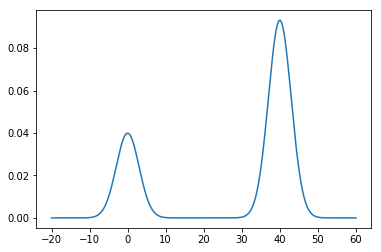

In [36]:
# Plot f
points = np.linspace(-20, 60, 10000)
plt.plot(points, f(points))

In [38]:
# Simple MH targetting f
sigma_prop = 2
N = 10000

jumps = np.random.normal(0, sigma_prop, N)
unif = np.random.uniform(0, 1, N)
samples = [1] # Set initial state to 1

for i in range(1,N):
    prop = samples[i-1] + jumps[i-1]
    a = f(prop) / f(samples[i-1])
    if a >= unif[i-1]:
        samples.append(prop) 
    else:
        samples.append(samples[i-1])

Mean: 0.04436719735758202
Var: 8.928436044168183


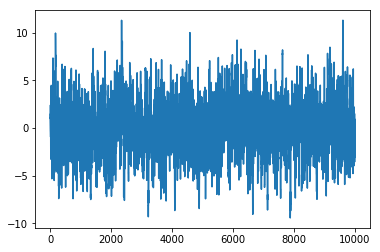

In [39]:
plt.plot(samples)
print('Mean: {}'.format(np.mean(samples)))
print('Var: {}'.format(np.var(samples)))

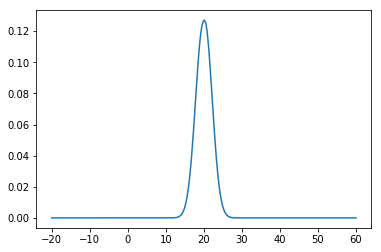

In [57]:
# AIS targetting f
def f_0(x):
    return stats.norm.pdf(x, loc=20, scale=2)

def f_j(x, beta):
    """ Melted distributions """
    return (f(x)**beta) * (f_0(x))**(1-beta)

def T(x, f, n_steps=10):
    """ Transition distribution: T(x'|x) using n-steps Metropolis sampler """
    for t in range(n_steps):
        x_prime = x + (sigma_prop*np.random.randn())

        a = f(x_prime) / f(x)

        if np.random.rand() < a:
            x = x_prime
    return x


plt.plot(points, f_j(points, 0.02))

In [45]:
n_inter = 50  # num of intermediate dists 
betas = np.linspace(0, 1, n_inter)

# Sampling 
n_samples = 1000
samples = np.zeros(n_samples)
weights = np.zeros(n_samples)

for t in tqdm(range(n_samples)):
    # Sample initial point from q(x)
    x = np.random.randn() * 2
    w = 1

    for n in range(1, len(betas)):
        # Transition         
        x = T(x, lambda x: f_j(x, betas[n]), n_steps=10)

        # Compute weight in log space (log-sum): w *= f_{n-1}(x_{n-1}) / f_n(x_{n-1})          
        w += (np.log(f_j(x, betas[n])) - np.log(f_j(x, betas[n-1])) )

    samples[t] = x
    weights[t] = np.exp(w)  # Transform back using exp 

23.963354587849302


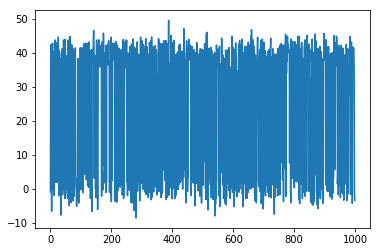

In [46]:
print(np.mean(samples))
plt.plot(samples)